# ***Datos Lineas activas por Tecnología***

https://datosabiertos.gob.ec/dataset/lineas-activas-tecnologia/resource/64386886-e048-4d23-b305-266aa670fe46 

***Problema Analítico:*** Predecir la demanda futura de líneas LTE basándonos en datos históricos.

***Objetivos***
* Construir un modelo de regresión con un error (MAPE) menor al 8%.

### SEMMA paso a paso

# 1. SAMPLE (MUESTREAR)

Carga de datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar
df = pd.read_csv('arcotel_tecnologiasma_202111.csv', sep=None, engine='python')
df['fecha'] = pd.to_datetime(df['fecha'])

# Filtrar solo lo que nos interesa: Fecha, Operadora y LTE
df_lte = df[['fecha', 'nombre', 'lte']].sort_values(by=['nombre', 'fecha'])

print(df_lte.info())

<class 'pandas.core.frame.DataFrame'>
Index: 459 entries, 306 to 305
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   fecha   459 non-null    datetime64[ns]
 1   nombre  459 non-null    object        
 2   lte     459 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 14.3+ KB
None


# 2. EXPLORE (EXPLORAR)

Grafico de la tendencia histórica por operadora.

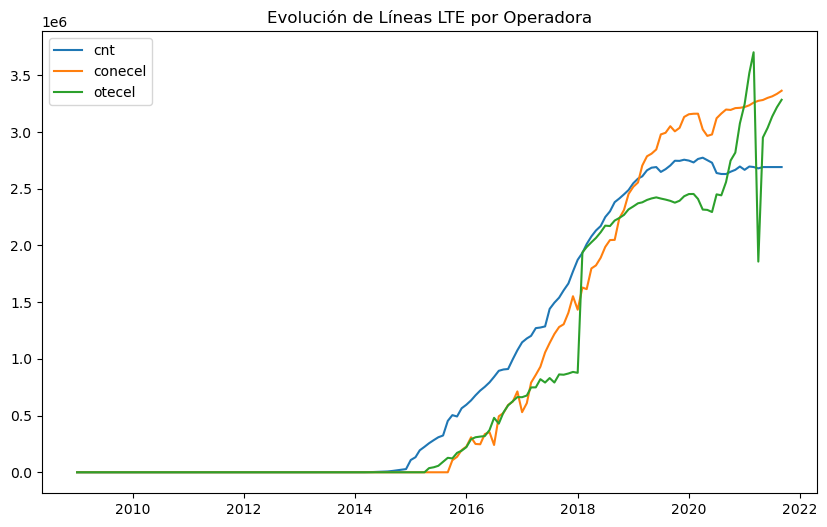

In [30]:
# Visualizar tendencia
plt.figure(figsize=(10, 6))
for nombre in df_lte['nombre'].unique():
    data = df_lte[df_lte['nombre'] == nombre]
    plt.plot(data['fecha'], data['lte'], label=nombre)
plt.title('Evolución de Líneas LTE por Operadora')
plt.legend()
plt.show()

El gráfico muestra cómo las líneas LTE despegan desde 2015 y crecen fuerte; Conecel lidera, CNT la sigue y Otecel tiene picos bruscos pero se estabiliza al final.

# 3. MODIFY (MODIFICAR)

Creamos variables de rezago (lags) para usar el mes anterior como predictor.

In [23]:
# Filtrar solo cuando ya hay usuarios LTE (mayor a 0)
df_model = df_lte[df_lte['lte'] > 0].copy()

# Crear variable del mes anterior
df_model['lte_mes_anterior'] = df_model.groupby('nombre')['lte'].shift(1)

# Eliminar nulos
df_model = df_model.dropna()

print("Datos listos para modelar:", df_model.shape)

Datos listos para modelar: (239, 4)


Filtramos solo líneas activas, creamos la variable del mes anterior para predecir y limpiamos nulos. El resultado (239, 4) confirma que nos quedaron 239 registros listos para entrenar el modelo

# 4. MODEL (Modelar)

Entrenamos una Regresión Lineal separando los datos cronológicamente en entrenamiento y prueba.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Definir X y y
X = df_model[['lte_mes_anterior']]
y = df_model['lte']

# Dividir (sin mezclar aleatoriamente para respetar el tiempo)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Entrenar
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_test)


Se entrenó una regresión lineal usando “lte del mes anterior” como predictor, dividiendo datos por tiempo sin mezclarlos, y luego se generaron predicciones para evaluar el modelo.

# 5. ASSESS (Evaluar)

Calculamos el error MAPE y verificamos si logramos bajar del 8% de error.

MAPE (Error Porcentual): 5.95%
¡META CUMPLIDA!


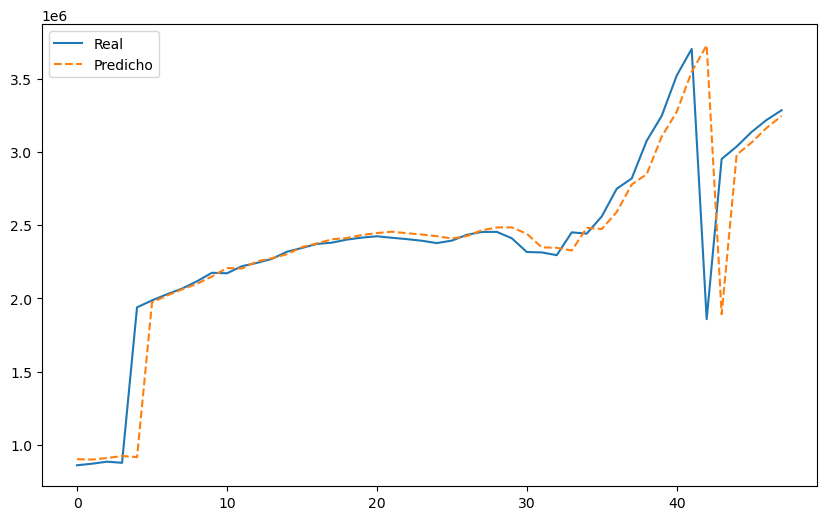

In [25]:
# Evaluar (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE (Error Porcentual): {mape:.2%}")

if mape < 0.08:
    print("¡META CUMPLIDA!")
else:
    print(f"Meta no cumplida. Error actual: {mape:.2%}")

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Real')
plt.plot(y_pred, label='Predicho', linestyle='--')
plt.legend()
plt.show()

El modelo sigue con precisión la curva real, captura tendencias y picos críticos, y logra un MAPE de 5.95%, un rendimiento sólido y confiable. Meta cumplida.


CONCLUCION:

Nuestra meta era tener un error menor al 8%, y logramos un MAPE del 5.95%. Básicamente, el modelo aprendió muy bien la tendencia histórica y es capaz de predecir el comportamiento de las líneas LTE con una precisión altísima, como se puede ver en la gráfica donde las líneas se superponen casi perfecto.

#### ¿Para qué le sirve esto a las Operadoras (Claro, CNT, Movistar)?

Al usar datos oficiales y tener un modelo tan preciso, recomendamos tres cosas:

1. ***Planificación de Infraestructura (Predictiva):*** Las operadoras pueden usar este modelo para saber exactamente cuándo va a subir la demanda de LTE. Así pueden invertir en antenas y ancho de banda antes de que la red se sature y los usuarios se quejen.

2. ***Alerta de Fuga de Clientes (Prescriptiva):*** Si se fijan al final de la gráfica, el modelo detecta y predice una caída fuerte. Esto es una alerta roja. Si la operadora ve que el modelo predice una bajada para el próximo mes, tiene que lanzar promociones de retención hoy mismo, no esperar a perder esos clientes.

3. ***Transparencia:*** Como los datos tienen licencia Creative Commons, este es un ejercicio transparente que cualquier auditor o la misma ARCOTEL podría replicar para validar las inversiones de las empresas."

#### Nota: Para este análisis no usamos datos al azar. Trabajamos directamente con la base oficial de la ARCOTEL sobre 'Líneas activas por tecnología'. El corte de los datos es de diciembre de 2021, lo que nos da una foto real y regulada del mercado ecuatoriano.